# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_info_columns = 50
pd.options.display.max_rows = 100
data = pd.read_csv(r"data/cleared_data.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data_eda = data.drop(['Player','Pos'],axis=1)

In [2]:
data_eda.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVP
count,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.00000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000
mean,2003.155329,26.683131,53.856272,26.246089,1268.794926,203.258218,440.093338,0.441147,28.756548,81.545380,0.220075,174.501670,358.547958,0.464044,0.472020,101.371301,134.255171,0.704005,64.107342,160.137165,224.244507,121.136638,41.968184,26.503310,77.688053,116.126091,536.644284,12.786055,0.510957,0.186913,0.311867,6.034036,14.048374,10.042462,13.148169,1.633761,1.523490,14.484186,18.882299,1.384157,1.297732,2.682662,0.07245,-1.524105,-0.403088,-1.927152,0.641003,0.002344
std,11.332734,4.103949,25.184004,29.485061,917.041694,183.376089,383.521395,0.094650,44.608885,117.958209,0.181450,167.975256,334.187362,0.101363,0.097086,109.885471,139.877491,0.185934,66.685561,145.385774,205.393446,141.973289,37.930790,37.286086,66.811103,79.003554,488.716980,6.081874,0.093548,0.203396,0.215815,4.849776,6.505279,4.957812,9.480074,0.965301,1.744852,6.276142,5.419056,2.109151,1.231370,3.032025,0.09892,3.965893,2.175576,4.914608,1.402582,0.048356
min,1982.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.51900,-73.800000,-31.100000,-86.700000,-2.600000,0.000000
25%,1994.000000,23.000000,35.000000,1.000000,417.500000,50.000000,117.000000,0.405000,0.000000,2.000000,0.000000,39.000000,87.000000,0.430000,0.441000,20.000000,29.000000,0.652000,15.000000,44.000000,63.000000,22.000000,11.000000,4.000000,22.000000,46.000000,130.000000,9.900000,0.480000,0.008000,0.194000,2.500000,9.200000,6.100000,6.500000,1.100000,0.400000,11.000000,15.300000,0.000000,0.300000,0.300000,0.03800,-3.200000,-1.500000,-3.800000,-0.200000,0.000000
50%,2004.000000,26.000000,61.000000,11.000000,1188.000000,157.000000,348.000000,0.446000,5.000000,20.000000,0.269000,126.000000,265.000000,0.472000,0.481000,65.000000,89.000000,0.747000,41.000000,126.000000,173.000000,72.000000,33.000000,13.000000,62.000000,114.000000,411.000000,12.900000,0.522000,0.104000,0.281000,5.000000,13.100000,9.200000,10.300000,1.500000,1.000000,13.700000,18.500000,0.600000,1.000000,1.700000,0.08100,-1.300000,-0.400000,-1.500000,0.100000,0.000000
75%,2013.000000,29.000000,76.000000,53.000000,2014.000000,311.000000,674.000000,0.488000,43.000000,125.000000,0.357000,262.000000,541.000000,0.510000,0.518000,145.500000,195.000000,0.813000,93.000000,230.000000,322.000000,167.000000,62.000000,33.000000,117.000000,175.000000,819.000000,15.800000,0.557000,0.333000,0.387000,8.900000,18.200000,13.400000,17.800000,2.000000,2.100000,17.000000,22.100000,2.200000,1.900000,4.100000,0.11900,0.500000,0.800000,0.600000,1.000000,0.000000
max,2021.000000,44.000000,85.000000,83.000000,3533.000000,1098.000000,2279.000000,1.000000,402.000000,1028.000000,1.000000,1086.000000,2213.000000,1.000000,1.500000,833.000000,972.000000,1.000000,558.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000,133.800000,1.500000,1.000000,6.000000,100.000000,10

In [6]:
corr = data_eda.corr() 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_eda[data_eda.MVP == 1][cols].mean(),data_eda[data_eda.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Korelacja Pearsona")
print(corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:])
compare


Korelacja Pearsona
VORP    0.245757
OWS     0.218280
WS      0.211493
FT      0.172900
FTA     0.166188
PTS     0.154322
DWS     0.146814
FG      0.146669
2P      0.144464
Name: MVP, dtype: float64


,MVP,No-MVP
VORP,7.7525,0.624297
OWS,10.8825,1.361843
WS,15.9125,2.651583
FT,493.3500,100.450461
FTA,613.8500,133.128502
PTS,2092.6500,532.988900
DWS,5.0275,1.288970
FG,758.1500,201.954660
2P,675.1500,173.325542


In [5]:
corr = data_eda.corr(method='spearman') 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_eda[data_eda.MVP == 1][cols].mean(),data_eda[data_eda.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Korelacja Spearmana")
print(corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:])
compare

Korelacja Pearsona
WS       0.083119
OWS      0.082718
VORP     0.082645
PER      0.082213
WS/48    0.082140
BPM      0.081583
PTS      0.081488
OBPM     0.081355
FG       0.080752
Name: MVP, dtype: float64


,MVP,No-MVP
WS,15.9125,2.651583
OWS,10.8825,1.361843
VORP,7.7525,0.624297
PER,27.9125,12.750520
WS/48,0.2637,0.072001
BPM,8.6350,-1.951965
PTS,2092.6500,532.988900
OBPM,6.7050,-1.543437
FG,758.1500,201.954660


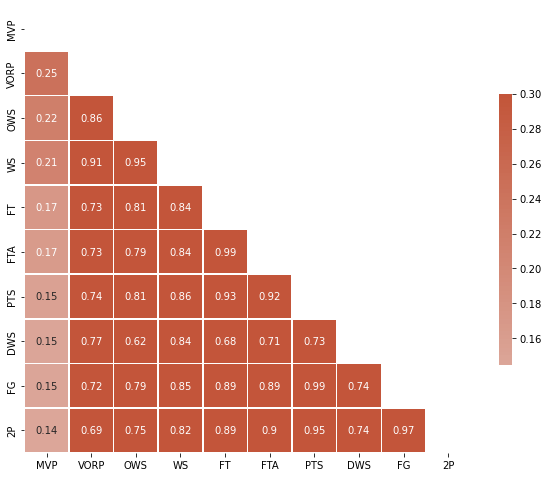

In [10]:
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index
mask = np.triu(np.ones_like(data_eda[cols].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

sns.heatmap(data_eda[cols].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)
fig.set_facecolor('white')            

c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

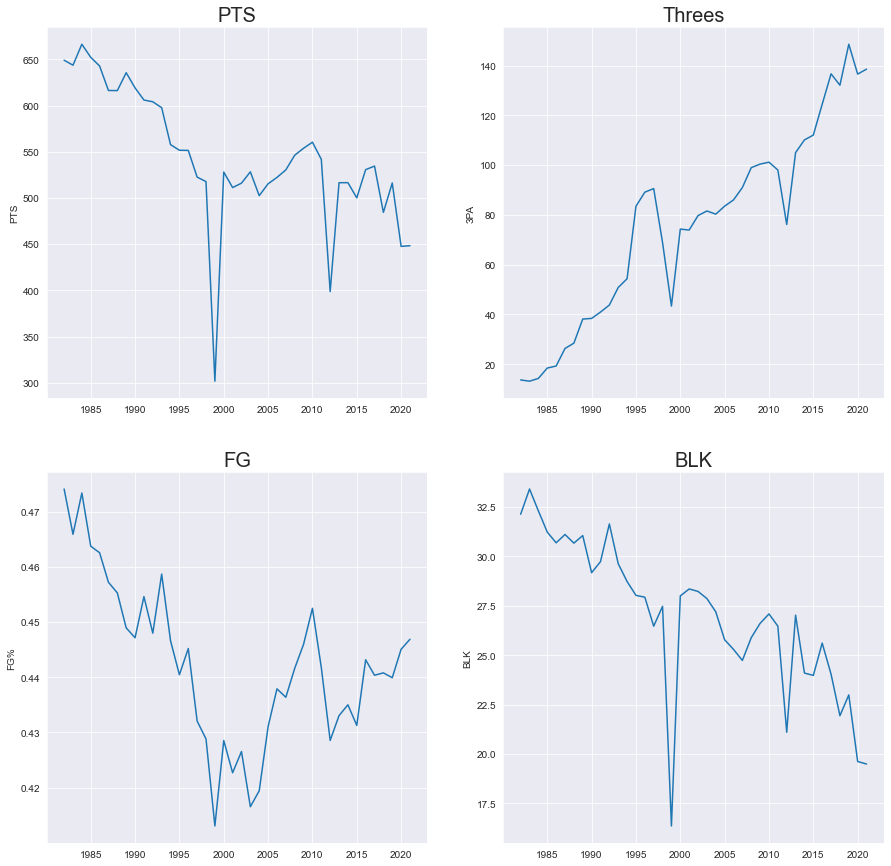

In [42]:
years = data_eda['Year'].unique()
pts = data_eda.groupby('Year')['PTS'].mean()
threes = data_eda.groupby('Year')['3PA'].mean()
fg = data_eda.groupby('Year')['FG%'].mean()
blk = data_eda.groupby('Year')['BLK'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(years,pts,ax = ax[0,0])
ax[0,0].set_title("PTS",fontsize=20)
sns.lineplot(years,threes,ax = ax[0,1])
ax[0,1].set_title("Threes",fontsize=20)
sns.lineplot(years,fg,ax = ax[1,0])
ax[1,0].set_title("FG",fontsize=20)
sns.lineplot(years,blk,ax = ax[1,1])
ax[1,1].set_title("BLK",fontsize=20)
fig.set_facecolor('white')


c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

Text(0.5, 1.0, 'PER')

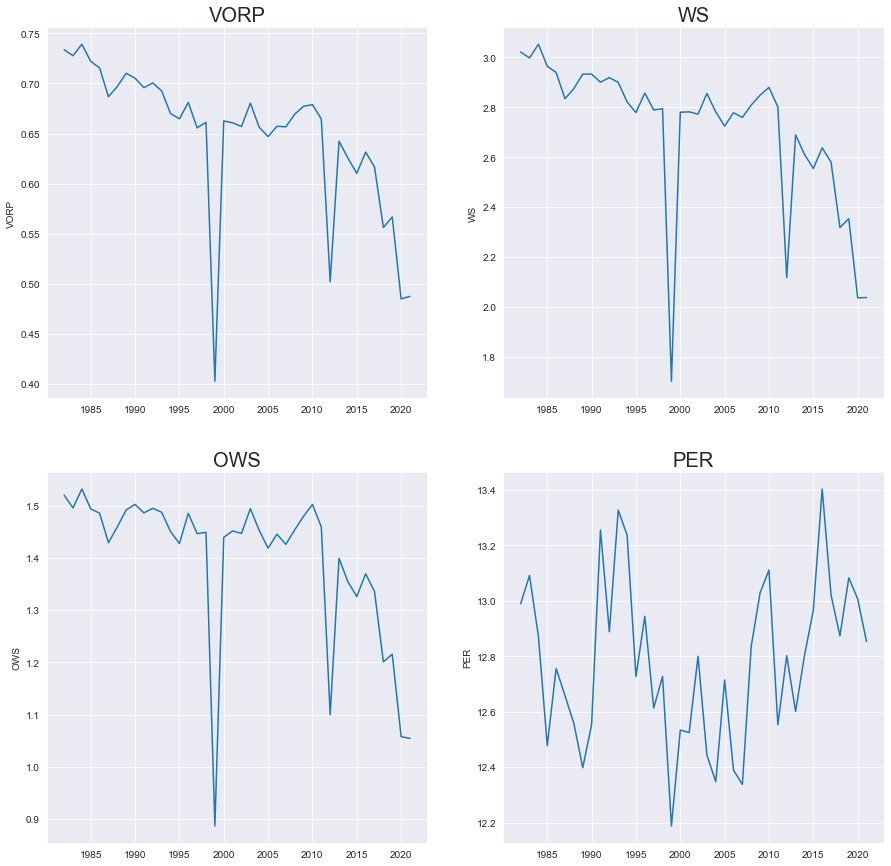

In [21]:
years = data_eda['Year'].unique()
vorp = data_eda.groupby('Year')['VORP'].mean()
ws = data_eda.groupby('Year')['WS'].mean()
ows = data_eda.groupby('Year')['OWS'].mean()
per = data_eda.groupby('Year')['PER'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(years,vorp,ax = ax[0,0])
ax[0,0].set_title("VORP",fontsize=20)
sns.lineplot(years,ws,ax = ax[0,1])
ax[0,1].set_title("WS",fontsize=20)
sns.lineplot(years,ows,ax = ax[1,0])
ax[1,0].set_title("OWS",fontsize=20)
sns.lineplot(years,per,ax = ax[1,1])
ax[1,1].set_title("PER",fontsize=20)


c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\THINK\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


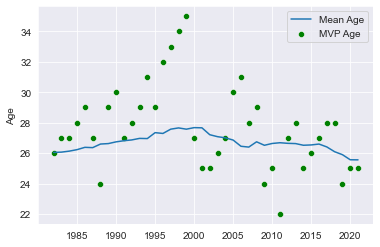

In [39]:
ages = data_eda.groupby('Year')['Age'].mean()

sns.lineplot(years,ages,label="Mean Age")
sns.scatterplot(years,data_eda[data_eda.MVP == 1]['Age'],color='green',label="MVP Age")


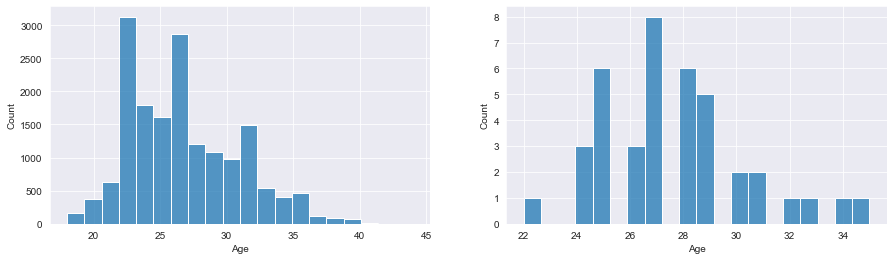

In [22]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.histplot(data_eda[data_eda.MVP == 0]['Age'],ax=axs[0],bins=20)
sns.histplot(data_eda[data_eda.MVP == 1]['Age'],ax=axs[1],bins=20)

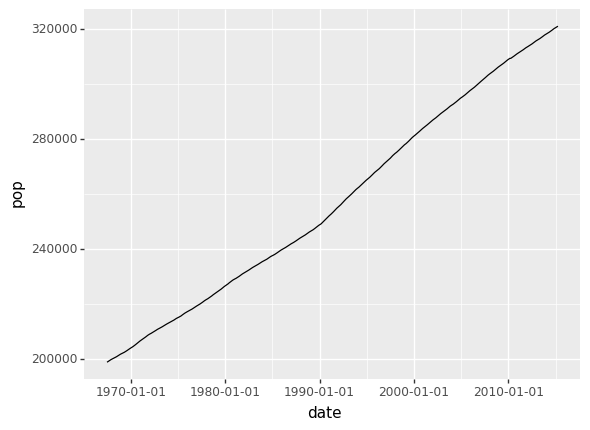

<ggplot: (-9223371872413786259)>

In [8]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line


(
ggplot(economics)   # What data to use
    + aes(x="date", y="pop")  # What variable to use 
    + geom_line()  # Geometric  object to use for drawing
)


In [40]:
mean_3 = data[['Player','3P%','3PA','3P']].sort_values('3P%',ascending=False)
mean_3 = mean_3[mean_3['3PA'] > 300 ].head(5)
mean_3.to_csv("data.csv")

In [29]:
ggplot( aes( Player, 3PA, fill = 3P ) ) +     
geom_bar(stat = 'identity', position = 'stack') +  
geom_label(aes(label = 3P%,  
                   y = 1000), 
               data = mean_3, 
               stat = 'identity', 
               position = "stack", 
               fill = "#FF4000", 
               color = "#00FFFF", 
               size = 4.5) +  
ggtitle("All-Time 3 Points Percentage Leaders") + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
xlab("") + 
scale_fill_manual(labels=c("3Pts-missed  ", "3Pts-made"), values=c("#66B266", "#008000")) + 
theme(legend.title=element_blank()) + 
theme(legend.position="bottom") 


SyntaxError: invalid syntax (<ipython-input-29-25e384286a68>, line 2)